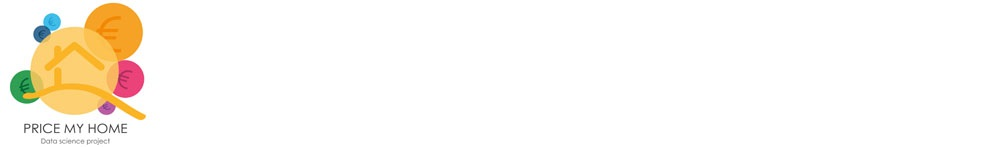

> ### <font color= "1F284B" >**IDEALISTA**</font><font color= "3B4D90" >_Web Scraper.</font>

________________

##### <font color= "1F284B" >PASO 0. IMPORTAR LIBRERÍAS</font>

In [ ]:
import requests
from time import sleep, strftime
import random
from random import randint
from bs4 import BeautifulSoup
from selenium import webdriver
import shutil
import pickle 
import os
from unidecode import unidecode
import pandas as pd
from selenium.webdriver.common.proxy import Proxy, ProxyType

________________

##### <font color= "1F284B" >PASO 1. HACER WEB SCRAPING DE hidemy.name para sacar servidores proxy</font>

In [2]:
chrome_driver = "C:/Users/nuria/Bootcamp Data Science/02. Febrero/chromedriver"
url_proxy = "https://hidemy.name/es/proxy-list/?maxtime=500&type=s&anon=4#list"
driver_proxy = webdriver.Chrome(executable_path = chrome_driver)

In [3]:
driver_proxy.get(url_proxy)

In [4]:
lista_proxies = driver_proxy.find_elements_by_xpath("//tbody/tr/td[1]")

In [5]:
proxies_https = []
for i in lista_proxies:
    proxies_https.append(i.text)

In [6]:
url_proxy_http = "https://hidemy.name/es/proxy-list/?maxtime=500&type=h&anon=4#list"
driver_proxy.get(url_proxy_http)

In [7]:
lista_proxies = driver_proxy.find_elements_by_xpath("//tbody/tr/td[1]")

In [8]:
proxies_http = []
for i in lista_proxies:
    proxies_http.append(i.text)

In [37]:
# Configure Proxy Option
prox = Proxy()
prox.proxy_type = ProxyType.MANUAL

# Proxy IP & Port
prox.https_proxy = proxies_https[1]
prox.http_proxy = proxies_http[1]

# Configure capabilities 
capabilities = webdriver.DesiredCapabilities.CHROME
prox.add_to_capabilities(capabilities)
chrome_driver = "C:/Users/nuria/Bootcamp Data Science/02. Febrero/chromedriver"
options = webdriver.ChromeOptions()
options.add_argument('--incognito')
driver = webdriver.Chrome(executable_path=chrome_driver, desired_capabilities=capabilities ,options = options)

________________

##### <font color= "1F284B" >PASO 1. ENTRAR EN LA PÁGINA</font>

In [10]:
url = "https://www.idealista.com/venta-viviendas/madrid-madrid/mapa"
driver.get(url) 

##### <font color= "1F284B" >PASO 2. INTRODUCIR UN BARRIO</font>

In [11]:
Centro =["Palacio, Centro", "lavapiés-Embajadores, Centro", "Huertas-Cortes, Centro", "Chueca-Justicia, Centro", "Malasaña-Universidad, Centro",
"Sol, Centro"]
Arganzuela = ["Imperial, Arganzuela", "Las Acacias, Arganzuela", "La Chopera, Arganzuela", "Legazpi, Arganzuela", "Delicias, Arganzuela",
"Palos de Moguer, Arganzuela", "Atocha, Arganzuela"]
Retiro = ["Pacífico, Retiro", "Adelfas, Retiro", "Estrella, Retiro", "Ibiza, Retiro", "Jerónimos, Retiro", "Niño Jesús, Retiro"]
Salamanca = ["Recoletos,Salamanca", "Goya, Salamanca", "Fuente del Berro, Salamanca", "Guindalera, Salamanca", "Lista, Salamanca",
"Castellana, Salamanca"]
Chamartin = ["El Viso, Chamartin", "Prosperidad, Chamartin", "Ciudad Jardín, Chamartin", "Hispanoamérica, Chamartin",
"Nueva España, Chamartin", "Castilla, Chamartin"]
Tetuan = ["Bellas Vistas, Tetuan", "Cuatro Caminos, Tetuan", "Castillejos, Tetuan", "Almenara, Tetuan",
"Valdeacederas, Tetuan", "Berruguete, Tetuan"]
Chamberi = ["Gaztambide,Chamberi", "Arapiles, Chamberi", "Trafalgar, Chamberi", "Almagro, Chamberi", "Ríos Rosas, Chamberi",
"Vallehermoso, Chamberi"]
Fuencarral= ["El Pardo, Fuencarral", "Fuentelarreina, Fuencarral", "Peña Grande, Fuencarral", "El Pilar, Fuencarral",
"La Paz, Fuencarral", "Valverde, Fuencarral", "Mirasierra, Fuencarral", "El Goloso, Fuencarral"]
Moncloa = ["Casa de Campo, Moncloa", "Argüelles, Moncloa", "Ciudad Universitaria, Moncloa", "Valdezarza, Moncloa",
"Valdemarín, Moncloa", "El Plantío, Moncloa", "Aravaca, Moncloa"]
Latina = ["Los Cármenes, Latina", "Puerta del Angel, Latina", "Lucero, Latina", "Aluche, Latina", "Campamento, Latina",
"Cuatro Vientos, Latina", "Las Aguilas, Latina"]
Carabanchel = ["Comillas, Carabanchel", "Opañel, Carabanchel", "San Isidro, Carabanchel", "Vista Alegre, Carabanchel",
"Puerta Bonita, Carabanchel", "Buenavista, Carabanchel", "Abrantes, Carabanchel"]
Usera = ["Orcasitas, Usera", "Orcasur, Usera", "San Fermín, Usera", "Almendrales, Usera", "Moscardó, Usera", "Zofío, Usera",
"Pradolongo, Usera"]
Puente_Vallecas =["Entrevías, Puente de Vallecas", "San Diego, Puente de Vallecas", "Palomeras Bajas, Puente de Vallecas",
"Palomeras Sureste, Puente de Vallecas", "Portazgo, Puente de Vallecas", "Numancia, Puente de Vallecas"]
Moratalaz = ["Pavones, Moratalaz", "Horcajo, Moratalaz", "Marroquina, Moratalaz", "Media Legua, Moratalaz", "Fontarrón, Moratalaz",
"Vinateros, Moratalaz"]
Ciudad_Lineal = ["Ventas, Ciudad Lineal", "Pueblo Nuevo,Ciudad Lineal", "Quintana, Ciudad Lineal", "Concepción, Ciudad Lineal",
"San Pascual, Ciudad Lineal", "San Juan Bautista, Ciudad Lineal", "Colina, Ciudad Lineal", "Atalaya, Ciudad Lineal",
"Costillares, Ciudad Lineal"]
Hortaleza = ["Palomas, Hortaleza", "Piovera, Hortaleza", "Canillas, Hortaleza", "Pinar del Rey, Hortaleza", "Apostol Santiago, Hortaleza",
"Valdefuentes, Hortaleza"]
Villaverde = ["San Andrés, Villaverde", "San Cristobal, Villaverde", "Butarque, Villaverde", "Los Rosales, Villaverde",
"Los Angeles, Villaverde"]
Villa_Vallecas = ["Casco Histórico de Vallecas, Villa de Vallecas", "Santa Eugenia, Villa de Vallecas",
"Ensanche de Vallecas, Villa de Vallecas"]
Vicalvaro = ["Casco Histórico de Vicálvaro, Vicálvaro", "Valdebernardo, Vicálvaro", "Valderrivas, Vicálvaro",
"El Cañaveral, Vicálvaro"]
San_blas = ["Simancas, San Blas", "Hellín, San Blas", "Amposta, San Blas", "Arcos, San Blas", "Rosas, San Blas",
"Rejas, San Blas", "Canillejas, San Blas", "El Salvador, San Blas"]
Barajas = ["Alameda de Osuna, Barajas", "Aeropuerto, Barajas", "Casco Histórico de Barajas, Barajas", "Timón, Barajas",
"Corralejos, Barajas"]

In [12]:
distritos = ["centro", "arganzuela", "retiro", "salamanca", "chamartin", "tetuan", "chamberi", "fuencarral", "moncloa", "latina",
          "carabanchel","usera", "puente de vallecas", "ciudad Lineal", "hortaleza", "villaverde",
          "villa de vallecas", "vicalvaro", "san blas", "barajas"]

In [39]:
def pisos(nombre_barrio, nombre_distrito): 
    driver.get(url) 
    barrio = unidecode(nombre_barrio)
    distrito = unidecode(nombre_distrito)
    sleep(2)
    # Introducir nombre del barrio para empezar la búsqueda:
    soup = BeautifulSoup(driver.page_source)
    buscar = soup.find("div", class_ = "searchBox-container")
    buscar = driver.find_element_by_class_name("searchBox")
    buscar.send_keys(barrio)
    sleep(2)
    link_barrio = driver.find_element_by_xpath("//a[@href = '/venta-viviendas/madrid/" + distrito.lower() + "/" + barrio.lower().split(",")[0] + "/mapa']")
    link_barrio.click()
    # Refrescamos sopa:
    sleep(2)
    soup = BeautifulSoup(driver.page_source)
    # Pinchamos filtros
    pisos = driver.find_element_by_id("homes")
    # Entramos en cada página:
    rango_paginas= []
    for i in range(1,2):
        rango_paginas.append(str(i))
    numero_paginas = []
    for numero in rango_paginas:
        numero_paginas.append("https://www.idealista.com/venta-viviendas/madrid/" + distrito.lower() + "/" + barrio.lower().split(",")[0] + "/pagina-" + numero + ".htm")
    for url_pagina in numero_paginas:
        try:
            sleep(2)
            # Entrar a cada piso.
            driver.get(url_pagina)
            soup = BeautifulSoup(driver.page_source)
            cada_titulo = driver.find_elements_by_xpath("//a[@class='item-link']")
            # Sacar valores y caracteristicas de cada piso.
            for i in cada_titulo:
                sleep(2)
                i.click()
                sleep(2)
                soup = BeautifulSoup(driver.page_source)
                precio = driver.find_element_by_xpath("//span[@class='txt-bold']").text
                caracteristicas = driver.find_elements_by_xpath("//div[@class='details-property_features']/ul/li")
                lista_caracteristicas = []
                for i in caracteristicas:
                    lista_caracteristicas.append(i.text)
                m2 = driver.find_element_by_xpath("//div[@class='info-features']").text
                driver.back()
            driver.back()
        except:
            pass
        driver.back()     
    driver.back()
    driver.back()
    return precio, lista_caracteristicas, m2

##### <font color= "1F284B" >- Distrito Centro</font>

palacio_centro = pisos(Centro[0], distritos[0])

In [ ]:
embajadores_centro = pisos(Centro[1], distritos[0])

In [ ]:
cortes_centro = pisos(Centro[2], distritos[0])

In [ ]:
justicia_centro = pisos(Centro[3], distritos[0])

In [ ]:
universidad_centro = pisos(Centro[4], distritos[0])

In [ ]:
sol_centro = pisos(Centro[5], distritos[0])

In [ ]:
df_centro = pd.DataFrame([palacio_centro,embajadores_centro,cortes_centro,
                          justicia_centro,universidad_centro,sol_centro],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_centro

In [ ]:
df_centro.to_csv("df_centro.csv",index=True)

In [ ]:
df_centro.to_excel("df_centro.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Arganzuela</font>

In [ ]:
imperial_arganzuela = pisos(Arganzuela[0], distritos[1])

In [ ]:
acacias_arganzuela = pisos(Arganzuela[1], distritos[1])

In [ ]:
chopera_arganzuela = pisos(Arganzuela[2], distritos[1])

In [ ]:
legazpi_arganzuela = pisos(Arganzuela[3], distritos[1])

In [ ]:
delicias_arganzuela = pisos(Arganzuela[4], distritos[1])

In [ ]:
palos_arganzuela = pisos(Arganzuela[5], distritos[1])

In [ ]:
atocha_arganzuela = pisos(Arganzuela[6], distritos[1])

In [ ]:
df_arganzuela = pd.DataFrame([imperial_arganzuela,acacias_arganzuela,chopera_arganzuela,
                          legazpi_arganzuela,delicias_arganzuela,palos_arganzuela,atocha_arganzuela],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_arganzuela

In [ ]:
df_arganzuela.to_csv("df_arganzuela.csv",index=True)

In [ ]:
df_arganzuela.to_excel("df_arganzuela.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Retiro</font>

In [ ]:
pacifico_retiro = pisos(Retiro[0], distritos[2])

In [ ]:
adelfas_retiro = pisos(Retiro[1], distritos[2])

In [ ]:
estrella_retiro = pisos(Retiro[2], distritos[2])

In [ ]:
ibiza_retiro = pisos(Retiro[3], distritos[2])

In [ ]:
jeronimos_retiro = pisos(Retiro[4], distritos[2])

In [ ]:
niñojesus_retiro = pisos(Retiro[4], distritos[2])

In [ ]:
df_retiro = pd.DataFrame([pacifico_retiro,adelfas_retiro,estrella_retiro,
                          ibiza_retiro,jeronimos_retiro,niñojesus_retiro],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_retiro

In [ ]:
df_retiro.to_csv("df_retiro.csv",index=True)

In [ ]:
df_retiro.to_excel("df_retiro.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Salamanca</font>

In [ ]:
recoletos_salamanca = pisos(Salamanca[0], distritos[3])

In [ ]:
goya_salamanca = pisos(Salamanca[1], distritos[3])

In [ ]:
fuenteberro_salamanca = pisos(Salamanca[2], distritos[3])

In [ ]:
guindalera_salamanca = pisos(Salamanca[3], distritos[3])

In [ ]:
lista_salamanca = pisos(Salamanca[4], distritos[3])

In [ ]:
castellana_salamanca = pisos(Salamanca[5], distritos[3])

In [ ]:
df_salamanca = pd.DataFrame([recoletos_salamanca,goya_salamanca,fuenteberro_salamanca,
                          guindalera_salamanca,lista_salamanca,castellana_salamanca],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_salamanca

In [ ]:
df_salamanca.to_csv("df_salamanca.csv",index=True)

In [ ]:
df_salamanca.to_excel("df_salamanca.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Chamartin</font>

In [ ]:
viso_chamartin = pisos(Chamartin[0], distritos[4])

In [ ]:
prosperidad_chamartin = pisos(Chamartin[1], distritos[4])

In [ ]:
ciudadjardin_chamartin = pisos(Chamartin[2], distritos[4])

In [ ]:
hispanoamerica_chamartin = pisos(Chamartin[3], distritos[4])

In [ ]:
nuevaespaña_chamartin = pisos(Chamartin[4], distritos[4])

In [ ]:
castilla_chamartin = pisos(Chamartin[5], distritos[4])

In [ ]:
df_chamartin = pd.DataFrame([viso_chamartin,prosperidad_chamartin,ciudadjardin_chamartin,
                          hispanoamerica_chamartin,nuevaespaña_chamartin,castilla_chamartin],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_chamartin

In [ ]:
df_chamartin.to_csv("df_chamartin.csv",index=True)

In [ ]:
df_chamartin.to_excel("df_chamartin.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Tetuán</font>

In [ ]:
bellasvistas_tetuan = pisos(Tetuan[0], distritos[5])

In [ ]:
cuatrocaminos_tetuan = pisos(Tetuan[1], distritos[5])

In [ ]:
castillejos_tetuan = pisos(Tetuan[2], distritos[5])

In [ ]:
almenara_tetuan = pisos(Tetuan[3], distritos[5])

In [ ]:
valdeacaderas_tetuan = pisos(Tetuan[4], distritos[5])

In [ ]:
berruguete_tetuan = pisos(Tetuan[5], distritos[5])

In [ ]:
df_tetuan = pd.DataFrame([bellasvistas_tetuan,cuatrocaminos_tetuan,castillejos_tetuan,
                          almenara_tetuan,valdeacaderas_tetuan,berruguete_tetuan],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_tetuan

In [ ]:
df_tetuan.to_csv("df_tetuan.csv",index=True)

In [ ]:
df_tetuan.to_excel("df_tetuan.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Chamberi</font>

In [ ]:
bellasvistas_chamberi = pisos(Chamberi[0], distritos[6])

In [ ]:
cuatrocaminos_chamberi = pisos(Chamberi[1], distritos[6])

In [ ]:
castillejos_chamberi = pisos(Chamberi[2], distritos[6])

In [ ]:
almenara_chamberi = pisos(Chamberi[3], distritos[6])

In [ ]:
valdeacaderas_chamberi = pisos(Chamberi[4], distritos[6])

In [ ]:
berruguete_chamberi = pisos(Chamberi[5], distritos[6])

In [ ]:
df_chamberi = pd.DataFrame([bellasvistas_tetuan,cuatrocaminos_tetuan,castillejos_tetuan,
                          almenara_tetuan,valdeacaderas_tetuan,berruguete_tetuan],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_chamberi

In [ ]:
df_chamberi.to_csv("df_chamberi.csv",index=True)

In [ ]:
df_chamberi.to_excel("df_chamberi.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Fuencarral</font>

In [ ]:
pardo_fuencarral = pisos(Fuencarral[0], distritos[7])

In [ ]:
fuentelarreina_fuencarral = pisos(Fuencarral[1], distritos[7])

In [ ]:
peñagrande_fuencarral = pisos(Fuencarral[2], distritos[7])

In [ ]:
pilar_fuencarral = pisos(Fuencarral[3], distritos[7])

In [ ]:
lapaz_fuencarral = pisos(Fuencarral[4], distritos[7])

In [ ]:
valverde_fuencarral = pisos(Fuencarral[5], distritos[7])

In [ ]:
mirasierra_fuencarral = pisos(Fuencarral[5], distritos[7])

In [ ]:
goloso_fuencarral = pisos(Fuencarral[5], distritos[7])

In [ ]:
df_fuencarral = pd.DataFrame([pardo_fuencarral,fuentelarreina_fuencarral,peñagrande_fuencarral,
                          pilar_fuencarral,lapaz_fuencarral,valverde_fuencarral,mirasierra_fuencarral,goloso_fuencarral],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_fuencarral

In [ ]:
df_fuencarral.to_csv("df_fuencarral.csv",index=True)

In [ ]:
df_fuencarral.to_excel("df_fuencarral.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Moncloa</font>

In [ ]:
casacampo_moncloa = pisos(Moncloa[0], distritos[8])

In [ ]:
arguelles_moncloa = pisos(Moncloa[1], distritos[8])

In [ ]:
ciu_moncloa = pisos(Moncloa[2], distritos[8])

In [ ]:
valdezarza_moncloa = pisos(Moncloa[3], distritos[8])

In [ ]:
valdemarin_moncloa = pisos(Moncloa[4], distritos[8])

In [ ]:
plantio_moncloa = pisos(Moncloa[5], distritos[8])

In [ ]:
aravaca_moncloa = pisos(Moncloa[5], distritos[8])

In [ ]:
df_moncloa = pd.DataFrame([casacampo_moncloa,arguelles_moncloa,ciu_moncloa,
                          valdezarza_moncloa,valdemarin_moncloa,plantio_moncloa,aravaca_moncloa],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_moncloa

In [ ]:
df_moncloa.to_csv("df_moncloa.csv",index=True)

In [ ]:
df_moncloa.to_excel("df_moncloa.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Latina</font>

In [ ]:
carmenes_latina = pisos(Latina[0], distritos[9])

In [ ]:
puertaangel_latina = pisos(Latina[1], distritos[9])

In [ ]:
lucero_latina = pisos(Latina[2], distritos[9])

In [ ]:
aluche_latina = pisos(Latina[3], distritos[9])

In [ ]:
campamento_latina = pisos(Latina[4], distritos[9])

In [ ]:
cuatrovientos_latina = pisos(Latina[5], distritos[9])

In [ ]:
aguilas_latina = pisos(Latina[5], distritos[9])

In [ ]:
df_latina = pd.DataFrame([carmenes_latina,puertaangel_latina,lucero_latina,
                          aluche_latina,campamento_latina,cuatrovientos_latina,aguilas_latina],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_latina

In [ ]:
df_latina.to_csv("df_latina.csv",index=True)

In [ ]:
df_latina.to_excel("df_latina.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Carabanchel</font>

In [ ]:
comillas_carabanchel = pisos(Carabanchel[0], distritos[10])

In [ ]:
opañel_carabanchel = pisos(Carabanchel[1], distritos[10])

In [ ]:
sanisidro_carabanchel = pisos(Carabanchel[2], distritos[10])

In [ ]:
vistaalegre_carabanchel = pisos(Carabanchel[3], distritos[10])

In [ ]:
puertabonita_carabanchel = pisos(Carabanchel[4], distritos[10])

In [ ]:
buenavista_carabanchel = pisos(Carabanchel[5], distritos[10])

In [ ]:
abrantes_carabanchel = pisos(Carabanchel[5], distritos[10])

In [ ]:
df_latina = pd.DataFrame([comillas_carabanchel,opañel_carabanchel,sanisidro_carabanchel,
                          vistaalegre_carabanchel,puertabonita_carabanchel,buenavista_carabanchel,abrantes_carabanchel],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_latina

In [ ]:
df_latina.to_csv("df_latina.csv",index=True)

In [ ]:
df_latina.to_excel("df_latina.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Usera</font>

In [ ]:
orcasitas_usera = pisos(Carabanchel[0], distritos[10])

In [ ]:
orcasur_usera = pisos(Carabanchel[1], distritos[10])

In [ ]:
sanfermin_usera = pisos(Carabanchel[2], distritos[10])

In [ ]:
almendrales_usera = pisos(Carabanchel[3], distritos[10])

In [ ]:
moscardo_usera = pisos(Carabanchel[4], distritos[10])

In [ ]:
zofio_usera = pisos(Carabanchel[5], distritos[10])

In [ ]:
pradolongo_usera = pisos(Carabanchel[5], distritos[10])

In [ ]:
df_usera = pd.DataFrame([orcasitas_usera,orcasur_usera,sanfermin_usera,
                          almendrales_usera,moscardo_usera,zofio_usera,pradolongo_usera],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_usera

In [ ]:
df_usera.to_csv("df_usera.csv",index=True)

In [ ]:
df_usera.to_excel("df_usera.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Puente Vallecas</font>

In [ ]:
entrevias_vallecas = pisos(Puente_Vallecas[0], distritos[11])

In [ ]:
sandiego_vallecas = pisos(Puente_Vallecas[1], distritos[11])

In [ ]:
palomerasbajas_vallecas = pisos(Puente_Vallecas[2], distritos[11])

In [ ]:
palomerassureste_vallecas = pisos(Puente_Vallecas[3], distritos[11])

In [ ]:
puentevallecas_vallecas = pisos(Puente_Vallecas[4], distritos[11])

In [ ]:
portazgo_vallecas = pisos(Puente_Vallecas[5], distritos[11])

In [ ]:
numancia_vallecas = pisos(Puente_Vallecas[6], distritos[11])

In [ ]:
df_vallecas = pd.DataFrame([entrevias_vallecas,sandiego_vallecas,palomerasbajas_vallecas,
                          palomerassureste_vallecas,puentevallecas_vallecas,portazgo_vallecas,numancia_vallecas],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_vallecas

In [ ]:
df_vallecas.to_csv("df_vallecas.csv",index=True)

In [ ]:
df_vallecas.to_excel("df_vallecas.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Moratalaz</font>

In [ ]:
pavones_moratalaz = pisos(Moratalaz[0], distritos[12])

In [ ]:
horcajo_moratalaz = pisos(Moratalaz[1], distritos[12])

In [ ]:
marroquina_moratalaz = pisos(Moratalaz[2], distritos[12])

In [ ]:
medialengua_moratalaz = pisos(Moratalaz[3], distritos[12])

In [ ]:
fontarron_moratalaz = pisos(Moratalaz[4], distritos[12])

In [ ]:
vinateros_moratalaz = pisos(Moratalaz[5], distritos[12])

In [ ]:
df_moratalaz = pd.DataFrame([pavones_moratalaz,horcajo_moratalaz,marroquina_moratalaz,
                          medialengua_moratalaz,fontarron_moratalaz,vinateros_moratalaz],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_moratalaz

In [ ]:
df_moratalaz.to_csv("df_moratalaz.csv",index=True)

In [ ]:
df_moratalaz.to_excel("df_moratalaz.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Ciudad lineal</font>

In [ ]:
ventas_clineal = pisos(Ciudad_Lineal[0], distritos[13])

In [ ]:
pueblonuevo_clineal = pisos(Ciudad_Lineal[1], distritos[13])

In [ ]:
quintana_clineal = pisos(Ciudad_Lineal[2], distritos[13])

In [ ]:
conception_clineal = pisos(Ciudad_Lineal[3], distritos[13])

In [ ]:
sanpascual_clineal = pisos(Ciudad_Lineal[4], distritos[13])

In [ ]:
sanjuan_clineal = pisos(Ciudad_Lineal[5], distritos[13])

In [ ]:
colina_clineal = pisos(Ciudad_Lineal[6], distritos[13])

In [ ]:
atalaya_clineal = pisos(Ciudad_Lineal[7], distritos[13])

In [ ]:
df_clineal = pd.DataFrame([ventas_clineal,pueblonuevo_clineal,quintana_clineal,
                          conception_clineal,sanpascual_clineal,sanjuan_clineal,colina_clineal,atalaya_clineal],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_clineal

In [ ]:
df_clineal.to_csv("df_clineal.csv",index=True)

In [ ]:
df_clineal.to_excel("df_clineal.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Hortaleza</font>

In [ ]:
palomas_hortaleza = pisos(Hortaleza[0], distritos[14])

In [ ]:
piovera_hortaleza = pisos(Hortaleza[1], distritos[14])

In [ ]:
canillas_hortaleza = pisos(Hortaleza[2], distritos[14])

In [ ]:
pinardelrey_hortaleza = pisos(Hortaleza[3], distritos[14])

In [ ]:
apostolsantiago_hortaleza = pisos(Hortaleza[4], distritos[14])

In [ ]:
valdefuentes_hortaleza = pisos(Hortaleza[5], distritos[14])

In [ ]:
df_hortaleza = pd.DataFrame([palomas_hortaleza,piovera_hortaleza,canillas_hortaleza,
                          pinardelrey_hortaleza,apostolsantiago_hortaleza,valdefuentes_hortaleza],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_hortaleza

In [ ]:
df_hortaleza.to_csv("df_hortaleza.csv",index=True)

In [ ]:
df_hortaleza.to_excel("df_hortaleza.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Villaverde</font>

In [ ]:
sanandres_villaverde = pisos(Villaverde[0], distritos[15])

In [ ]:
sancristobal_villaverde = pisos(Villaverde[1], distritos[15])

In [ ]:
butarque_villaverde = pisos(Villaverde[2], distritos[15])

In [ ]:
losrosales_villaverde = pisos(Villaverde[3], distritos[15])

In [ ]:
losangeles_villaverde = pisos(Villaverde[4], distritos[15])

In [ ]:
df_villaverde = pd.DataFrame([sanandres_villaverde,sancristobal_villaverde,butarque_villaverde,
                          losrosales_villaverde,losangeles_villaverde],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_villaverde

In [ ]:
df_villaverde.to_csv("df_villaverde.csv",index=True)

In [ ]:
df_villaverde.to_excel("df_villaverde.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Villa de Vallecas</font>

In [ ]:
casco_villvallecas = pisos(Villa_Vallecas[0], distritos[16])

In [ ]:
santaeugenia_villvallecas = pisos(Villa_Vallecas[1], distritos[16])

In [ ]:
ensanche_villvallecas = pisos(Villa_Vallecas[2], distritos[16])

In [ ]:
df_villvallecas = pd.DataFrame([sanandres_villaverde,sancristobal_villaverde,butarque_villaverde,
                          losrosales_villaverde,losangeles_villaverde],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_villvallecas

In [ ]:
df_villvallecas.to_csv("df_villvallecas.csv",index=True)

In [ ]:
df_villvallecas.to_excel("df_villvallecas.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Vicalvaro</font>

In [ ]:
casco_vicalvaro = pisos(Vicalvaro[0], distritos[17])

In [ ]:
valdebernardo_vicalvaro = pisos(Vicalvaro[1], distritos[17])

In [ ]:
valderrivas_vicalvaro = pisos(Vicalvaro[2], distritos[17])

In [ ]:
cañaveral_vicalvaro = pisos(Vicalvaro[2], distritos[17])

In [ ]:
df_vicalvaro = pd.DataFrame([casco_vicalvaro,valdebernardo_vicalvaro,valderrivas_vicalvaro,
                          cañaveral_vicalvaro],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_vicalvaro

In [ ]:
df_vicalvaro.to_csv("df_vicalvaro.csv",index=True)

In [ ]:
df_vicalvaro.to_excel("df_vicalvaro.xlsx",index=True)

##### <font color= "1F284B" >- Distrito San Blas</font>

In [ ]:
simancas_sanblas = pisos(San_blas[0], distritos[18])

In [ ]:
hellin_sanblas = pisos(San_blas[1], distritos[18])

In [ ]:
amposta_sanblas = pisos(San_blas[2], distritos[18])

In [ ]:
arcos_sanblas = pisos(San_blas[3], distritos[18])

In [ ]:
rosas_sanblas = pisos(San_blas[4], distritos[18])

In [ ]:
rejas_sanblas = pisos(San_blas[5], distritos[18])

In [ ]:
canillejas_sanblas = pisos(San_blas[6], distritos[18])

In [ ]:
salvador_sanblas = pisos(San_blas[7], distritos[18])

In [ ]:
df_sanblas = pd.DataFrame([simancas_sanblas,hellin_sanblas,amposta_sanblas,
                          arcos_sanblas, rosas_sanblas,rejas_sanblas,canillejas_sanblas,salvador_sanblas],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_sanblas

In [ ]:
df_sanblas.to_csv("df_sanblas.csv",index=True)

In [ ]:
df_sanblas.to_excel("df_sanblas.xlsx",index=True)

##### <font color= "1F284B" >- Distrito Barajas</font>

In [ ]:
alameda_barajas = pisos(Barajas[0], distritos[19])

In [ ]:
aeropuerto_barajas = pisos(Barajas[1], distritos[19])

In [ ]:
casco_barajas = pisos(Barajas[2], distritos[19])

In [ ]:
timon_barajas = pisos(Barajas[3], distritos[19])

In [ ]:
corralejos_barajas = pisos(Barajas[4], distritos[19])

In [ ]:
df_barajas = pd.DataFrame([alameda_barajas,aeropuerto_barajas,casco_barajas,
                          timon_barajas, corralejos_barajas],
                         columns = ["precio","caracteristicas","superficie"])

In [ ]:
df_barajas

In [ ]:
df_barajas.to_csv("df_barajas.csv",index=True)

In [ ]:
df_barajas.to_excel("df_barajas.xlsx",index=True)